# Curves and Surfaces
Games programming typically includes many objects of various types in game environments.

In this workbook, we will examine how to construct different types of curves and surfaces using mathematical expressions. We will use the ideas of parameterisation to calculate tangents to curves in 2D and tangent planes and normals to surfaces in 3D.

In [1]:
## Libraries
%matplotlib inline
import numpy as np
import sympy as sym
import math as math
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d
from sympy.utilities.lambdify import lambdify, implemented_function

In [2]:
#we'll need to draw arrows for the 3D bit:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

## Parameterisation
Parameterisation is a tool that we can use to simplify the expression of many curves and surfaces.

Mapping curves in 2D requires us to store two positions in Cartesian space: $x$ and $y$.

However, curves are continuous: often the $x$ and $y$ positions are related, and are functions of one single parameter. By working with parameters, and knowing that we can convert these back to real space, we can often reduce the complexity of the problem.

Computationally, this is equivalent to using a single function to generate a range of positions on a curve, rather than storing two (possibly large) arrays of $x$ and $y$ positions.

Parameterisation has another advantage: tangents to curves (in 2D) and tangent planes and normals (in 3D) can be easily calculated using the parameterised form of the curve or surface.



### Example: parameterising a circle
Let's say we want to plot the circle $x^2+y^2=4$.
We need to create, store and plot every pair of positions $(x,y)$ which satisfy this equation.
This will create two arrays of $x$ and $y$ values as seen below:

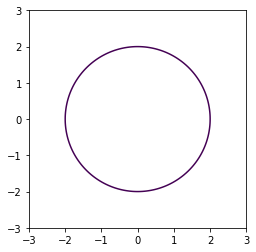

In [3]:
X = np.linspace(-2.5, 2.5, 100)
Y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(X,Y)
F = X**2 + Y**2 - 4
fig, ax = plt.subplots(1)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.contour(X,Y,F,[0]) #contour where x^2+y^2-4=0
ax.set_aspect(1)
plt.show()

This approach is computationally inefficient.

We know from experience that the equation of the circle seen above is satisfied by expressions

$$
x = 2\cos{(t)},~~~ y = 2\sin{(t)}.
$$

Each coordinate, $x$ and $y$, is controlled by a function of a single parameter, which we will call $t$; in this example, this physically is equivalent to an angle. By expressing our coordinates in this way, we have reduced the problem: we now only need to know a range of parameter values, and the functions to relate the parameter back to real space. Computationally, we no longer need to store two position arrays, but now can work out the $x$ and $y$ values based on a single array of angles:

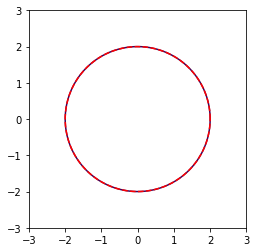

In [4]:
t = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(1)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.contour(X,Y,F,[0]) #contour where x^2+y^2-4=0
ax.plot(2*np.cos(t), 2*np.sin(t), c='r', linestyle='dashed', label='parameterised eqn.')
ax.set_aspect(1)
plt.show()

In the above plot, we have overlaid the parameterised versions of the curve onto a contour of the original equation, and they are identical.

### Example: tangent and normal to circle

What is even neater is that this parameterisation allows us to also calculate a tangent to the circle at any given position. From this we can also easily calculate the normal to the curve at any point.

The tangent vector at a given point depends on the rate of change of the position vector with respect to the parameter. The normal takes the slope of the tangent and inverts it.

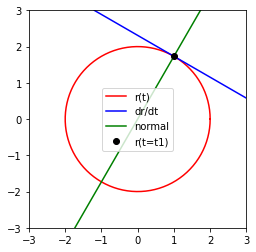

In [5]:
t  = sym.Symbol('t') #parameter
r  = [ 2*sym.cos(t),     2*sym.sin(t)] #position r(t)
dr = [ sym.diff(r[0],t), sym.diff(r[1],t) ] #tangent, dr/dt
# tangent location in parameter space (degrees)
t1 = math.radians(60)

#turn rx and ry into functions to plot them
xf = lambdify(t,r[0])
yf = lambdify(t,r[1])
#specify parameter range
tvals = np.linspace(0, 2*np.pi, 100)
# calculate x and y arrays of positions based on t
xvals = xf(tvals)
yvals = yf(tvals)
#plot
fig, ax = plt.subplots(1)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.plot(xvals,yvals,'r', label='r(t)')
# location where tangent calculated
xp = float(r[0].subs({t:t1}))
yp = float(r[1].subs({t:t1}))
# to draw tangent line, need gradient
# gradient can be infinite if dx=0
if dr[0].subs({t:t1}) == 0:
    print ('avoiding divide by zero')
    slp = 100
else:
    slp = float(dr[1].subs({t:t1})/dr[0].subs({t:t1}))
#ax.plot(xp,yp,'ro')
ax.axline([xp,yp],slope=slp, c='b', label='dr/dt')
ax.axline([xp,yp],slope=-1/slp, c='g', label='normal')
ax.plot(xp,yp,'ko', label='r(t=t1)')
ax.legend(loc="center")
ax.set_aspect(1)

plt.show()

In the above example, the tangent is calculated by differentiating the position (stored in Python as a 2-element list) with respect to the parameter ''t''. We should be able to do this differentiation stage by hand. Because Python carries out the differentiation, and symbolic computation doesn't marry up well with the plotting functions in Python, this plotting routine looks longer than perhaps it needs to be.

**Challenge: re-run this example for a different value of t1, to see how if the code successfully calculates the tangent and normal (confirm visually)**

The advantage here is that Python can do this for **any** parameterised curve.
Let's prove this by making up a parameterised curve and attempting to evaluate the tangent to the curve at a specific point:

### Example: tangent to a parabola?
**Determine the tangent vector and normal vector for the curve $\vec{\mathbf{r}} = (1-u){\vec{\mathbf{i}}}+2u^2{\vec{\mathbf{j}}}$ at the point $u=1$.**

(note this example is inspired by Tutorial Q1(i) on Curves and Surfaces: Q1(i) is actually a straight line and hence its tangent is a bit boring to pick as an example - feel free to modify this example as you see fit, if you want to check the answer of Q1(i) for yourself!)

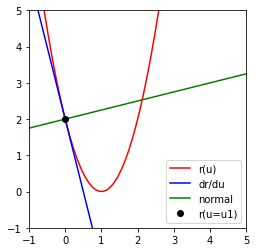

In [6]:
u  = sym.Symbol('u') #parameter
r  = [ 1-u,     2*u**2] #position r(t)
dr = [ sym.diff(r[0],u), sym.diff(r[1],u) ] #tangent, dr/dt
# tangent location in parameter space (degrees)
u1 = 1.0

#turn rx and ry into functions to plot them
xf = lambdify(u,r[0])
yf = lambdify(u,r[1])
#specify parameter range
uvals = np.linspace(-5,5, 100)
# calculate x and y arrays of positions based on t
xvals = xf(uvals)
yvals = yf(uvals)
#plot
fig, ax = plt.subplots(1)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
ax.plot(xvals,yvals,'r', label='r(u)')
# location where tangent calculated
xp = float(r[0].subs({u:u1}))
yp = float(r[1].subs({u:u1}))
# to draw tangent line, need gradient
# gradient can be infinite if dx=0
if dr[0].subs({u:u1}) == 0:
    print ('avoiding divide by zero')
    slp = 100
else:
    slp = float(dr[1].subs({u:u1})/dr[0].subs({u:u1}))
#ax.plot(xp,yp,'ro')
ax.axline([xp,yp],slope=slp, c='b', label='dr/du')
ax.axline([xp,yp],slope=-1/slp, c='g', label='normal')
ax.plot(xp,yp,'ko', label='r(u=u1)')
ax.legend(loc="best")
ax.set_aspect(1)

plt.show()

Seen above, the function is a parabola in $y$, but the derivative of the function always produces the tangent curve which just grazes the curve at the required position.

## 3D objects

In 2D, we have seen that a parameterised curve (which has a position vector as a function of a single parameter) can yield an expression which describes the tangent to the curve (by ordinary differentiation of the function with respect to the parameter).

In 3D, surfaces are commonly described as a function of two parameters (commonly described using the letters $u$ and $v$), and have the form:

$$
{\vec{\mathbf{S}}}(u,v)=x(u,v){\vec{\mathbf{i}}}+y(u,v){\vec{\mathbf{j}}}+z(u,v){\vec{\mathbf{k}}}
$$

In the lectures we saw that two tangent vectors are created, by partially differentiating the surface expression with respect to each parameter:

$$
{\vec{\mathbf{t}}}_u = \frac{\partial{\vec{\mathbf{S}}}}{\partial u}=\frac{\partial x}{\partial u}{\vec{\mathbf{i}}}+\frac{\partial y}{\partial u}{\vec{\mathbf{j}}}+\frac{\partial z}{\partial u}{\vec{\mathbf{k}}},\\
{\vec{\mathbf{t}}}_v = \frac{\partial{\vec{\mathbf{S}}}}{\partial v}=\frac{\partial x}{\partial v}{\vec{\mathbf{i}}}+\frac{\partial y}{\partial v}{\vec{\mathbf{j}}}+\frac{\partial z}{\partial v}{\vec{\mathbf{k}}}.
$$

**For a refresher on calculation of partial derivatives, please view the [partial derivatives workbook](https://abertay-university-sdi.github.io/CMP502-505_Maths/CMP505/CMP505_partialderivs.html).**

The tangent vectors ${\vec{\mathbf{t}}}_u$ and ${\vec{\mathbf{t}}}_v$ together define an entire plane:

![Picture](https://github.com/Abertay-University-SDI/CMP502-505_Maths/blob/main/CMP505/Tangent_plane.jpg?raw=1)
*https://mathresearch.utsa.edu/wiki/index.php?title=Tangent_Plane*

We know that 3D planes all have the same form of equation:

$$
ax+by+cz=d.
$$

We also know that a plane with this equation has a normal $\vec{\mathbf{n}} = a{\vec{\mathbf{i}}}+b{\vec{\mathbf{j}}}+c{\vec{\mathbf{k}}}$, which means if we can calculate the normal vector to the surface, we can use the point where the tangent meets the surface to identify the tangent plane equation.

We saw in the lectures that the normal to the surface is calculated using the vector (cross) product of the tangent vectors, to create a vector perpendicular to both tangent vectors.

To calculate the equation for a tangent plane at a specific point on any 3D object, we have to:


1.   Calculate the tangent vectors ${\vec{\mathbf{t}}}_u$ and ${\vec{\mathbf{t}}}_v$.
2.   Evaluate the cross product of these to produce a normal to the surface at a specific point $u=u_1,v=v_1$:

$$
\vec{\mathbf{n}} = {\vec{\mathbf{t}}}_u \times {\vec{\mathbf{t}}}_v = a{\vec{\mathbf{i}}}+b{\vec{\mathbf{j}}}+c{\vec{\mathbf{k}}}.
$$

3.   The values of $a$, $b$ and $c$ can immediately be entered into the tangent plane equation $ax+by+cz=d$.
4.   Substitute the parameter values $(u_1,v_1)$ into the expression which describes the surface ${\vec{\mathbf{S}}}(u,v)$, and determine $x(u_1,v_1)$, $y(u_1,v_1)$ and $z(u_1,v_1)$.
5.    Use these values to determine d:

$$
d = ax(u_1,v_1)+by(u_1,v_1)+cz(u_1,v_1).
$$



## Example: Parabolic bowl
We will use the example from the lectures of the parabolic bowl, whose surface is governed by the equation:

$$
{\vec{\mathbf{S}}}(r,\theta)=r\cos{\theta}{\vec{\mathbf{i}}}+r\sin{\theta}{\vec{\mathbf{j}}}+r^2{\vec{\mathbf{k}}}.
$$

For this example we will plot the normal and create a tangent plane for this equation at a position $r=2$ and $\theta=0$.

We will have python calculate the partial derivatives, the cross product and plot the surface, the normal and the tangent plane:

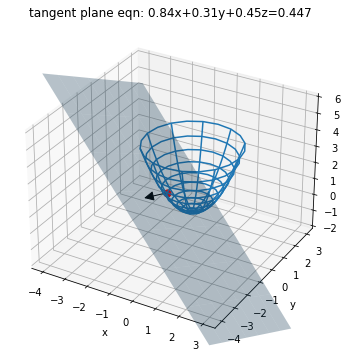

In [7]:
#define symbols and 3D parametric functions
r, theta  = sym.Symbol('r'), sym.Symbol('theta') #parameters
s  = [ r*sym.cos(theta), r*sym.sin(theta), r**2 ] #position r(t)
dsdr = [ sym.diff(s[0],r), sym.diff(s[1],r), sym.diff(s[2],r) ] #tangent, ds/dr
dsdtheta = [ sym.diff(s[0],theta), sym.diff(s[1],theta), sym.diff(s[2],theta) ] #tangent, ds/dtheta

v1 = sym.Matrix(dsdr)
v2 = sym.Matrix(dsdtheta)
cp = v1.cross(v2)

# tangent location in parameter space (degrees)
r1 = 1.0
theta1 = math.radians(200)

#turn rx and ry into functions to plot them
xf = lambdify([r,theta],s[0])
yf = lambdify([r,theta],s[1])
zf = lambdify([r,theta],s[2])

#set up parameter ranges
rvals = np.linspace(0,2, 21)  #range of parameter r
thetavals = np.linspace(0, 2*np.pi, 21) #range of parameter theta
myr, myt = np.meshgrid(rvals,thetavals) # make a grid of values

# calculate x,y,z arrays of positions based on r and theta
xvals, yvals, zvals = xf(myr,myt), yf(myr,myt), zf(myr,myt)

#point on surface
xp = float(s[0].subs({r:r1, theta:theta1}))
yp = float(s[1].subs({r:r1, theta:theta1}))
zp = float(s[2].subs({r:r1, theta:theta1}))
p = [xp,yp,zp]

# unit normal to surface
nx = float(cp[0].subs({r: r1, theta: theta1}))
ny = float(cp[1].subs({r: r1, theta: theta1}))
nz = float(cp[2].subs({r: r1, theta: theta1}))
n = [nx,ny,nz]
n = n/np.linalg.norm(n)

#tangent plane
d = -np.sum(n * p)
tpeqn = "tangent plane eqn: {:.2f}x+{:.2f}y+{:.2f}z={:.3f}".format(n[0],n[1],n[2],d)

xlim = -4,4
ylim = -4,4
zlim = -2,6
xx, yy = np.meshgrid(np.arange(*xlim), np.arange(*ylim))
zz = -(n[0] * xx + n[1] * yy + d) / n[2]
#zz[zz>6] = np.nan
#zz[zz<-2] = np.nan

# plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,6))
ax.set_zlim(*zlim)
surf = ax.plot_wireframe(xvals, yvals, zvals, rstride=2, cstride=2, label='parabolic bowl')
ax.scatter(xp, yp, zp, color='r', s=50, label='location')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0, linewidth=1)
b = Arrow3D([xp, xp-n[0]], [yp, yp-n[1]], [zp, zp-n[2]], **arrow_prop_dict)
ax.add_artist(b)
ax.plot_surface(xx, yy, zz, alpha=0.3, label='tangent plane')
ax.title.set_text(tpeqn)
#ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In the result you can see the bowl, with the tangent plane grazing the bowl at the chosen location.

**Challenge: re-run this example for a different value of $r$ or $\theta$, to see if the code successfully calculates the tangent plane and normal (confirm visually)**

Thus, we have verified that Python carries out the same mathematical operations we learned in the lectures, if we want to calculate a normal to a surface or its tangent plane.

## Over to you
What about some different surfaces? Can you use the calculation and plotting tools you have been given to examine spheres, or cones, or cylinders?

What about importing the parametric expressions from the tutorial questions to examine what they look like visually, and if they return the correct normals and plane equations using Python as found by hand?